# Transcription-Progeny Correlation
This notebook plots the correlation between transcription and progeny production for each valid viral barcode in each infected cell 

Import Python modules:

In [1]:
from IPython.display import display

from dms_variants.constants import CBPALETTE

import pandas as pd

import plotnine as p9

Hardcode variables for now:

In [2]:
cell_annotations_csv = snakemake.input.cell_annotations
viral_bc_by_cell_valid_csv = snakemake.input.viral_barcodes_valid_csv
filtered_progeny_viral_bc_csv = snakemake.input.filtered_progeny_viral_bc_csv
barcoded_viral_genes = snakemake.params.barcoded_viral_genes
expt = expt = snakemake.wildcards.expt
plot = snakemake.output.plot
transcription_progeny_csv = snakemake.output.transcription_progeny_csv

Style parameters. *N.b.* `CBPALETTE` is defined in imports above.

In [3]:
p9.theme_set(p9.theme_classic())

### Load data
The following data will be loaded:
* list of cell barcodes and viral tags
* viral barcode transcription measurements
* viral progeny measurements

Load cell barcodes and viral tags:

In [4]:
cell_barcodes = pd.read_csv(cell_annotations_csv)
cell_barcodes = (
    cell_barcodes
    [['cell_barcode',
      'infected',
      'infecting_viral_tag',
      'total_UMIs',
      'viral_UMIs',
      'frac_viral_UMIs']]
)
display(cell_barcodes)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429
...,...,...,...,...,...,...
3367,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048
3368,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937
3369,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182
3370,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486


Load viral barcode transcription measurements:

In [5]:
transcriptome_viral_barcodes = pd.read_csv(valid_viral_bc_by_cell_csv)
transcriptome_viral_barcodes = transcriptome_viral_barcodes.drop(columns=['valid_viral_bc'])
assert set(transcriptome_viral_barcodes['gene']) == set(barcoded_viral_genes), \
       "Barcoded genes in barcode counts do not match expectation."
display(transcriptome_viral_barcodes)

,cell_barcode,gene,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs
0,AAACGAAGTAGACGTG,fluHA,AAGTAAGCGACATGAG,251,0.002019
1,AAAGGATTCTGATGGT,fluHA,GTGGAGTCGCCAGTTC,114,0.001424
2,AAAGGGCCAGGCTACC,fluHA,AAAGTGATCCCCATAC,8,0.000395
3,AAAGGGCCAGGCTACC,fluHA,CATTTAACGCTGTGAG,15,0.000741
4,AAAGGGCCAGGCTACC,fluHA,CGTAGGATGTTGCGTC,31,0.001532
...,...,...,...,...,...
1172,TTTACCAGTCGCTTAA,fluNA,TTGGAGGAGACCCGTG,7,0.000061
1173,TTTAGTCCATCATCCC,fluNA,AGAAACCTCGACATAT,11,0.000463
1174,TTTAGTCCATCATCCC,fluNA,TTGGACGCATTGCAAA,18,0.000757
1175,TTTCACAAGCCAAGCA,fluNA,GGTATCAGTTATTGTT,186,0.002718


Load viral progeny measurements:

In [6]:
progeny_viral_barcodes = pd.read_csv(filtered_progeny_viral_bc_csv)
progeny_viral_barcodes = progeny_viral_barcodes.drop(columns=['Unnamed: 0'])
progeny_viral_barcodes = (progeny_viral_barcodes
                          .rename(columns={'tag': 'infecting_viral_tag',
                                           'average_freq': 'progeny_freq'}))
assert set(progeny_viral_barcodes['gene']) == set(barcoded_viral_genes), \
       "Barcoded genes in barcode counts do not match expectation."
progeny_sources = list(progeny_viral_barcodes['source'].unique())
display(progeny_viral_barcodes)

,source,infecting_viral_tag,gene,viral_barcode,progeny_freq
0,second_infection,both,fluHA,AAAAAATCATATTTCA,0.000010
1,second_infection,both,fluHA,AAAAATTAACGTTAAT,0.000010
2,second_infection,both,fluHA,AAATTTCCAAAATGCA,0.000010
3,second_infection,both,fluHA,AACAAAAGAGTACGTT,0.000010
4,second_infection,both,fluHA,AACCCAAAAATATTAG,0.000010
...,...,...,...,...,...
2053,supernatant,wt,fluNA,TTTCTTTACTCAGAAT,0.002060
2054,supernatant,wt,fluNA,TTTGTCGGCAGTCACT,0.000010
2055,supernatant,wt,fluNA,TTTTAACGTTATACTA,0.000010
2056,supernatant,wt,fluNA,TTTTACCTACGTAGTT,0.000010


## Integrate data sources.

First, make a copy of each cell barcode for each barcoded viral gene and each progeny source:

In [7]:
viral_barcode_freqs = cell_barcodes.copy()
viral_barcode_freqs = (
    pd.concat([viral_barcode_freqs
               .assign(gene=gene)
               for gene in barcoded_viral_genes]))
viral_barcode_freqs = (
    pd.concat([viral_barcode_freqs
               .assign(source=source)
               for source in progeny_sources]))
assert len(viral_barcode_freqs) == len(cell_barcodes) * \
    len(barcoded_viral_genes) * len(progeny_sources), \
    "Need one copy of each cell barcode for each data source"
display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125,fluHA,second_infection
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111,fluHA,second_infection
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161,fluHA,second_infection
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770,fluHA,second_infection
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection
...,...,...,...,...,...,...,...,...
3367,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048,fluNA,supernatant
3368,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant
3369,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182,fluNA,supernatant
3370,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,fluNA,supernatant


Merge viral barcode frequencies from the transcriptome:

In [8]:
viral_barcode_freqs = pd.merge(
    left=viral_barcode_freqs,
    right=transcriptome_viral_barcodes,
    on=['cell_barcode', 'gene'],
    how='left'
    )
display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125,fluHA,second_infection,NaN,NaN,NaN
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111,fluHA,second_infection,NaN,NaN,NaN
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161,fluHA,second_infection,NaN,NaN,NaN
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770,fluHA,second_infection,NaN,NaN,NaN
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019
...,...,...,...,...,...,...,...,...,...,...,...
14243,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048,fluNA,supernatant,NaN,NaN,NaN
14244,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN
14245,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182,fluNA,supernatant,NaN,NaN,NaN
14246,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,fluNA,supernatant,ACATCTTATTTACACG,39.0,0.000260


Merge viral barcode frequencies from the progeny:

In [9]:
viral_barcode_freqs = pd.merge(
    left=viral_barcode_freqs,
    right=progeny_viral_barcodes,
    on=['source', 'infecting_viral_tag', 'gene', 'viral_barcode'],
    how='left'
    )
display(viral_barcode_freqs)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,progeny_freq
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125,fluHA,second_infection,NaN,NaN,NaN,NaN
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111,fluHA,second_infection,NaN,NaN,NaN,NaN
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161,fluHA,second_infection,NaN,NaN,NaN,NaN
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770,fluHA,second_infection,NaN,NaN,NaN,NaN
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
14243,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048,fluNA,supernatant,NaN,NaN,NaN,NaN
14244,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN,NaN
14245,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182,fluNA,supernatant,NaN,NaN,NaN,NaN
14246,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,fluNA,supernatant,ACATCTTATTTACACG,39.0,0.000260,0.00179


## Plot correlation between viral transcription and progeny production:
Only look at infected cells that are not doublets:

In [10]:
infected_cells = (viral_barcode_freqs
                  .query('(infected == "infected") and '
                         '(infecting_viral_tag != "both")'))
display(infected_cells)

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,gene,source,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,progeny_freq
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,fluHA,second_infection,AAGTAAGCGACATGAG,251.0,0.002019,0.00001
14,AAAGGATTCTGATGGT,infected,syn,80029,3893,0.048645,fluHA,second_infection,GTGGAGTCGCCAGTTC,114.0,0.001424,0.00001
16,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,AAAGTGATCCCCATAC,8.0,0.000395,0.00001
17,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CATTTAACGCTGTGAG,15.0,0.000741,0.00001
18,AAAGGGCCAGGCTACC,infected,wt,20241,355,0.017539,fluHA,second_infection,CGTAGGATGTTGCGTC,31.0,0.001532,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
14211,TTTAGTCCATCATCCC,infected,wt,23766,1216,0.051166,fluNA,supernatant,TTGGACGCATTGCAAA,18.0,0.000757,0.00001
14213,TTTAGTCGTGCTCCGA,infected,wt,195173,6905,0.035379,fluNA,supernatant,NaN,NaN,NaN,NaN
14219,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,fluNA,supernatant,GGTATCAGTTATTGTT,186.0,0.002718,0.00001
14244,TTTGATCTCGCATTGA,infected,wt,170914,10415,0.060937,fluNA,supernatant,NaN,NaN,NaN,NaN


Plot the correlation between individual viral barocdes in the transcriptome and the progeny:

/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 260 rows containing missing values.


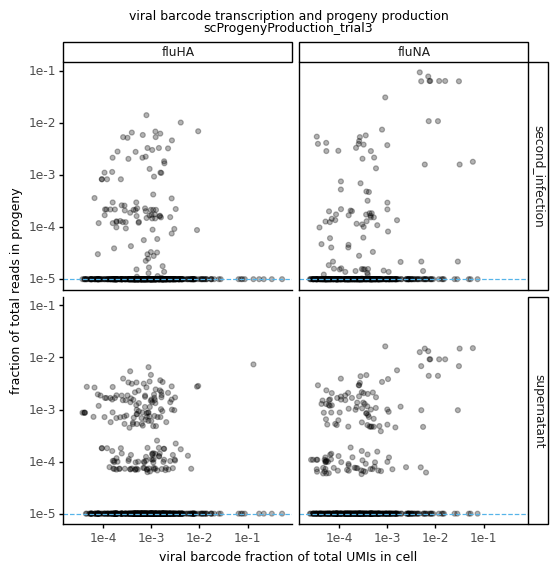

<ggplot: (8752395538517)>

In [11]:
viral_barcode_correlation = (
    p9.ggplot((infected_cells),
              p9.aes(x='frac_viral_bc_UMIs',
                     y='progeny_freq')) +
       p9.geom_point(alpha=0.3) +
       p9.geom_hline(yintercept=1e-5, linetype='dashed', color=CBPALETTE[2]) +
       p9.facet_grid('source~gene') +
       p9.ggtitle('viral barcode transcription and progeny production\n'
                  f'{expt}') +
       p9.scale_x_log10() +
       p9.scale_y_log10() +
       p9.labs(x='viral barcode fraction of total UMIs in cell',
               y='fraction of total reads in progeny') +
       p9.theme(figure_size=(6, 6),
                plot_title=p9.element_text(size=9),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center'))
display(viral_barcode_correlation)

Plot the correlation between a cell's total viral burden and progeny production of each infecting viral barcode:

/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 260 rows containing missing values.


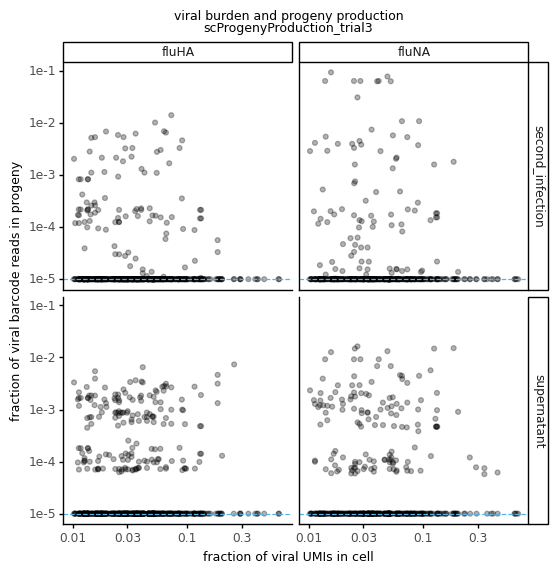

<ggplot: (8752395171211)>

In [12]:
viral_burden_correlation = (
    p9.ggplot((infected_cells),
              p9.aes(x='frac_viral_UMIs',
                     y='progeny_freq')) +
       p9.geom_point(alpha=0.3) +
       p9.geom_hline(yintercept=1e-5, linetype='dashed', color=CBPALETTE[2]) +
       p9.facet_grid('source~gene') +
       p9.ggtitle('viral burden and progeny production\n'
                  f'{expt}') +
       p9.scale_x_log10() +
       p9.scale_y_log10() +
       p9.labs(x='fraction of viral UMIs in cell',
               y='fraction of viral barcode reads in progeny') +
       p9.theme(figure_size=(6, 6),
                plot_title=p9.element_text(size=9),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center'))
display(viral_burden_correlation)

## Output
Save the correlation plot and the CSV containing info about viral progeny from infected cells:

In [13]:
# save plot
print(f"Saving plot to {plot}")
p9.ggsave(plot=viral_barcode_correlation, filename=plot, verbose=False)

Saving plot to results/viral_fastq10x/scProgenyProduction_trial3_transcription_progeny_correlation.pdf


/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 260 rows containing missing values.


In [14]:
# save CSV
infected_cells.to_csv(transcription_progeny_csv, index=False)